# Operations available on GPS Tracks

Our focus on this section concern operations and predicats available on the library.

## Let's start by defining our environment

This task is only useful for the online notebook

In [1]:
import matplotlib.pyplot as plt
import os
import sys

#-------------------------------------------------------
# Import de tracklib

module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import tracklib as trk

## The following operations are available:

### arithmetic operators: 

"+" : Concatenation of two tracks

"-" : Profil de différence entre 2 traces

"*" : sur-échantillonne la trace avec le facteur voulu

"**": ré-échantillonne une trace au nombre de points voulu

"/" : Even split of tracks (returns n segments)

"//" : ré-échantillonne une trace pour faire correspondre ses timestamps à une autre trace

"%" : supprime des observations à intervalle régulier

"<" : supprime les n derniers points d'une trace

">" : supprime les n premiers points d'une trace

"[i]" : retourne ou modifie la ième observation de la trace

### Built-in function

len() : nombres d'observations par trace

### comparison predicates: 

"<" :
    
"<=" :

### Shape enclosing

Let's start by creating a sample track

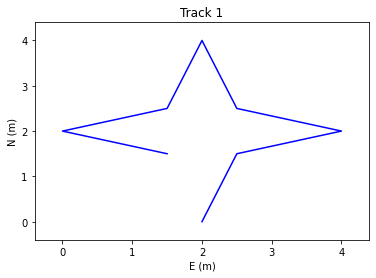

In [2]:
trk.ObsTime.setReadFormat("4Y-2M-2D 2h:2m:2s")
trace2 = trk.Track([], 1)
trace2.addObs(trk.Obs(trk.ENUCoords(2.0, 0.0), trk.ObsTime.readTimestamp("2018-01-01 10:00:00")))
trace2.addObs(trk.Obs(trk.ENUCoords(2.5, 1.5), trk.ObsTime.readTimestamp("2018-01-01 10:00:05")))
trace2.addObs(trk.Obs(trk.ENUCoords(4.0, 2.0), trk.ObsTime.readTimestamp("2018-01-01 10:00:15")))
trace2.addObs(trk.Obs(trk.ENUCoords(2.5, 2.5), trk.ObsTime.readTimestamp("2018-01-01 10:00:20")))
trace2.addObs(trk.Obs(trk.ENUCoords(2.0, 4.0), trk.ObsTime.readTimestamp("2018-01-01 10:00:25")))
trace2.addObs(trk.Obs(trk.ENUCoords(1.5, 2.5), trk.ObsTime.readTimestamp("2018-01-01 10:00:35")))
trace2.addObs(trk.Obs(trk.ENUCoords(0.0, 2.0), trk.ObsTime.readTimestamp("2018-01-01 10:00:25")))
trace2.addObs(trk.Obs(trk.ENUCoords(1.5, 1.5), trk.ObsTime.readTimestamp("2018-01-01 10:00:25")))

trace2.plot('b-')

Then, we can create shape enclosing from track itself or via the function *boundingShape*

<AxesSubplot:title={'center':'Track 1'}, xlabel='E (m)', ylabel='N (m)'>

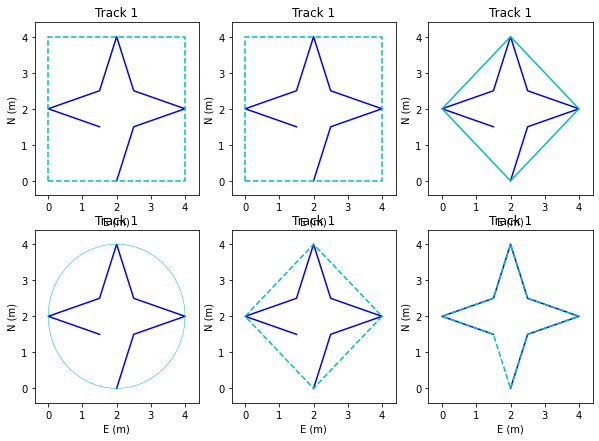

In [3]:
fig = plt.figure(figsize = (10, 7))

# ==============================================================
#   Bounding box
ax1 = plt.subplot2grid((2, 3), (0, 0))
trace2.plot('b-', append=ax1)
R = trace2.bbox()
R.plot('c--', append=ax1)

# ==============================================================
#   Shape : enclosing box (same as bounding box)
ax2 = plt.subplot2grid((2, 3), (0, 1))
trace2.plot('b-', append=ax2)
R1 = trk.boundingShape(trace2, trk.MODE_ENCLOSING_BBOX)
R1.plot('c--', append=ax2)

# ==============================================================
#   Shape : minimal enclosing bounding box
ax3 = plt.subplot2grid((2, 3), (0, 2))
trace2.plot('b-', append=ax3)
R1 = trk.boundingShape(trace2, trk.MODE_ENCLOSING_MBR)
X = []
Y = []
for coord in R1[0]:
    X.append(coord[0])
    Y.append(coord[1])
ax3.plot(X, Y, 'c-')

# ==============================================================
#   Shape : enclosing circle
ax4 = plt.subplot2grid((2, 3), (1, 0))
trace2.plot('b-', append=ax4)
C = trk.boundingShape(trace2, trk.MODE_ENCLOSING_CIRCLE)
C.plot('c-', append=ax4)

# ==============================================================
#   Shape : enclosing convex hull
ax5 = plt.subplot2grid((2, 3), (1, 1))
trace2.plot('b-', append=ax5)
P = trk.boundingShape(trace2, trk.MODE_ENCLOSING_CONVEX)
ax5.plot(P[0::2], P[1::2], 'c--')


# ==============================================================
#   Shape : enclosing polygon
ax6 = plt.subplot2grid((2, 3), (1, 2))
trace2.plot('b-', append=ax6)
P = trace2.getEnclosedPolygon()
P.plot('c--', append=ax6)
